# Iris Dataset Classification with apenet's Neural Network

This notebook demonstrates how to build, train, and evaluate a neural network model using the apenet library, using the Iris Dataset as an example.

## Import Libraries

In [1]:
import numpy as np
## Data processing
from sklearn.datasets import fetch_openml
## Data visualization
import matplotlib.pyplot as plt

# Import our library
import os
os.chdir('..')
from apenet.eye.history import plot_history
from apenet.nn.models.mlp import MLP
from apenet.utils.data import train_test_split, standardize
from apenet.nn.loss import CrossEntropyLoss
from apenet.nn.optim import SGD

## Set Random Generator

In [2]:
seed = 42
rng = np.random.default_rng(seed=seed)

# Data Overview

## Load and Preprocess Data


In [3]:
X, y = fetch_openml("Fashion-MNIST",
                    version=1,
                    return_X_y=True,
                    as_frame=False)

## Data Visualization

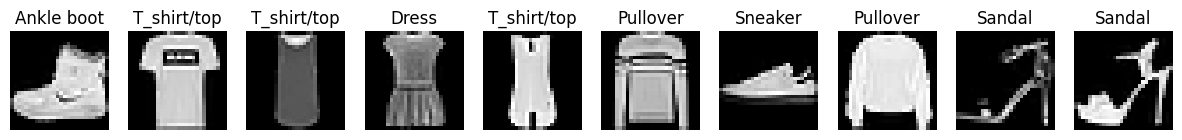

In [4]:
# Visualize some examples from the dataset
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(class_names[y.astype(int)[i]])
    ax.axis('off')
plt.show()

## Data Preprocessing


In [5]:
X = standardize(X)
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, rng=rng)

# Print the sizes of the training and test datasets
print(f"Training dataset size: {X_train.shape}")
print(f"Test dataset size: {X_test.shape}")

Training dataset size: (56000, 784)
Test dataset size: (14000, 784)


# Model Overview

## Create Model


In [21]:
# Architecture hyperparameters
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
hidden_sizes = [64, 32, 16]

model = MLP(
    input_size=input_size,
    hidden_sizes=hidden_sizes,
    output_size=num_classes,
    hidden_activation='relu',
    output_activation=None,
    initializer='He',
    rng=rng
)

# Training hyperparameters
learning_rate = 0.01
epochs = 100
batch_size = 256

## Define Loss Function and Optimizer


In [22]:
loss_fn = CrossEntropyLoss()
optimizer = SGD(model.get_parameters(), learning_rate=learning_rate)

## Train Model


In [23]:
history = model.fit(
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=epochs,
    batch_size=batch_size,
    verbose=10,
    X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test
)

Epoch 1/100: train_loss=2.5733, train_acc=0.1277, val_loss=2.2296, val_acc=0.1924
Epoch 10/100: train_loss=1.2327, train_acc=0.5457, val_loss=1.2297, val_acc=0.5489
Epoch 20/100: train_loss=0.8840, train_acc=0.7034, val_loss=0.8892, val_acc=0.6984
Epoch 30/100: train_loss=0.7147, train_acc=0.7554, val_loss=0.7259, val_acc=0.7476
Epoch 40/100: train_loss=0.6354, train_acc=0.7784, val_loss=0.6494, val_acc=0.7708
Epoch 50/100: train_loss=0.5868, train_acc=0.7936, val_loss=0.6024, val_acc=0.7886
Epoch 60/100: train_loss=0.5524, train_acc=0.8055, val_loss=0.5694, val_acc=0.7998
Epoch 70/100: train_loss=0.5260, train_acc=0.8149, val_loss=0.5442, val_acc=0.8101
Epoch 80/100: train_loss=0.5050, train_acc=0.8224, val_loss=0.5245, val_acc=0.8160
Epoch 90/100: train_loss=0.4879, train_acc=0.8278, val_loss=0.5086, val_acc=0.8219
Epoch 100/100: train_loss=0.4738, train_acc=0.8322, val_loss=0.4957, val_acc=0.8248


## Evaluate Model


In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test, loss_fn=loss_fn)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.4957, Test Accuracy: 0.8248


## Plot Training History


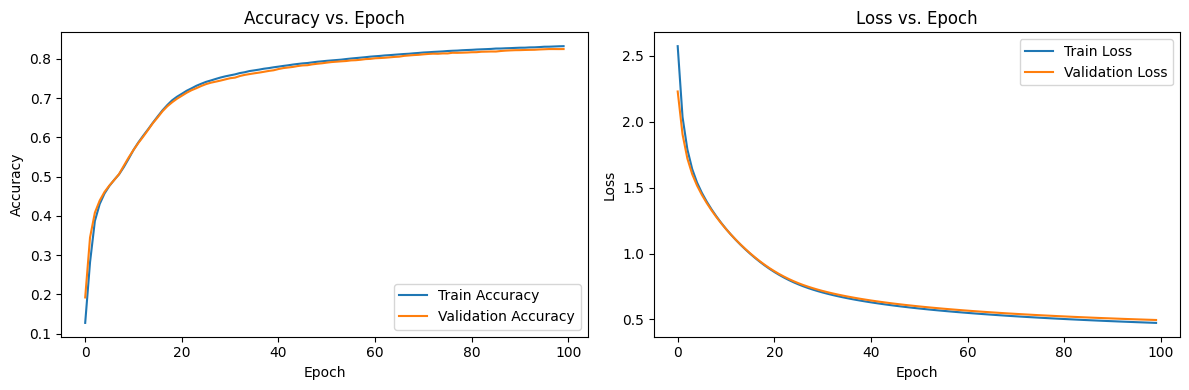

In [25]:
plot_history(history)